# Question 1: Costs and benefits of transaction?

**Costs**
- The dollar cost of the acquisition would be a significant initial cost. Should Cobalt use debt-financing, they would need to add interest into the cost of the purchase as well.
- In order to properly integrate Indigo into their system there would be a significant cost in restructuring the company managerially. There would also be a cost of training existing employees on the new culture due to the transition depending on how much distinction Cobalt would like between the two brands.
- To resolve the operational/supply chain issues that have developed from rising demand, Colbalt will have to spend money reorganizing Indigo's supply chain. This might mean creating new contracts or expanding existing ones.

**Benefits**
- Assuming they do little to affect Indigo's existing brand, Cobalt will acquire indigo's existing (and expanding) consumer base, expanding their market share.
- Cobalt gets the benefit of both diversification in their business and potential synergies between their core brand and this acquisition.
- Colbalt will acquire valuable customer data and human capital that might allow them to better understand how Indigo developed its success.

**Cobalt**
- pro: expand to online and new geography which would diversify revenues
- con: unsure on the unit economics and new complexities related to online sales

**Indigo**
- pro: possible merging of costs (i.e. storage distributions)
- con: misaligned goals could be detrimental to what the customer wants (i.e.Cobalt wants profits and customers want niche fashion)

# Question 2: Understanding value of acquisition?

**Questions**
- How large is Indigo's consumer base? What percent of their revenue are from repeat customers?
- What is their average/distribution of customer lifetime value?
- What is their most/least popular product?
- What are their biggest cost drivers?
  - What are their existing contracts?
- What are the profit margins on each of their products?
- What are their competitive advantages/disadvantages?
- Is the comapany leveraged?
- What are their existing contracts with suppliers?
  - What is their current ratio/ability to cover short term obligations?
  - What is their turnover rate and costs of storing inventory?

**Limitations of Data**  
In some transactions the specific products are missing due to the niche SKUs. The data is heavily limited to information on revenue. In order to gain a stronger understanding of the company, Colbalt will also need information on the costs in running the business.

**Presentation**
1. Goal of acquistion
2. Financial Stability of Indigo  
    a. What does the future of both companies look like.
3. Finally answer does the potential for new revenues outwiegh the risk of the new branch.


In [ ]:
# This code allows for multiple outputs to be shown in the same cell rather than the last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# !pip install data_paths
# import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
customer_df = (
    pd
    .read_parquet('/content/20-indigo-acquisition-customer.pq')
)

transactions_df = (
    pd
    .read_parquet('/content/20-indigo-acquisition-txn_item.pq')
)

product_df = (
    pd.
    read_parquet('/content/20-indigo-acquisition-product.pq')
)

## Data Validation

In [ ]:
# indentify if there are null values and where there are
print('customer data\n', customer_df.isnull().sum())
print('transaction data\n', transactions_df.isnull().sum())
print('product data\n', product_df.isnull().sum())

customer data
 customer_id    0
cohort_date    0
dtype: int64
transaction data
 transaction_id           0
date                     0
product_id         1166574
customer_id              0
amount_spent             0
amount_returned          0
dtype: int64
product data
 product_id         0
category        1128
subcategory     5292
gender             0
color          24486
dtype: int64


#### Some transactions will have untraceable products. Since some transactions have missing labeling - this makes sense due to the niche products provided.

In [ ]:
# check to see if there are duplicate customer_id's in customer_df
print('customer data\n', customer_df.duplicated(subset='customer_id').sum())
print('product data\n', product_df.duplicated(subset='product_id').sum())

customer data
 0
product data
 0


In [ ]:
print('customer data\n', customer_df.info())
print('transaction data\n', transactions_df.info())
print('product data\n', product_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172470 entries, 0 to 172469
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  172470 non-null  int64         
 1   cohort_date  172470 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.6 MB
customer data
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224421 entries, 0 to 2380869
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   transaction_id   int64         
 1   date             datetime64[ns]
 2   product_id       float64       
 3   customer_id      int64         
 4   amount_spent     float64       
 5   amount_returned  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 118.8 MB
transaction data
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189587 entries, 0 to 189586
Data columns (total 5 columns):
 

### Data Wrangling

In [ ]:
# change dates for easier grouping and analysis
cleaned_customer_df = customer_df.copy()
cleaned_customer_df['cohort_year'] = pd.DatetimeIndex(cleaned_customer_df['cohort_date']).year
cleaned_customer_df['cohort_month'] = pd.DatetimeIndex(cleaned_customer_df['cohort_date']).month
cleaned_customer_df['cohort_day'] = pd.DatetimeIndex(cleaned_customer_df['cohort_date']).day
cleaned_customer_df.head(5)

customer_id cohort_date  cohort_year  cohort_month  cohort_day
0        72021  2013-03-27         2013             3          27
1        74273  2015-03-18         2015             3          18
2       200269  2015-05-21         2015             5          21
3       109737  2010-10-04         2010            10           4
4       272410  2014-11-19         2014            11          19

In [ ]:
# again change dates for easier grouping and analysis
cleaned_transactions_df = transactions_df.copy()
cleaned_transactions_df['transaction_year'] = pd.DatetimeIndex(cleaned_transactions_df['date']).year
cleaned_transactions_df['transaction_month'] = pd.DatetimeIndex(cleaned_transactions_df['date']).month
cleaned_transactions_df['transaction_day'] = pd.DatetimeIndex(cleaned_transactions_df['date']).day
cleaned_transactions_df.head(5)

transaction_id       date  product_id  customer_id  amount_spent  \
0          198339 2016-02-19         NaN       271393     21.511879   
1          165872 2018-01-01         NaN       397887      2.505400   
2          280805 2016-07-06         NaN         7298      5.097192   
3            1247 2018-01-24    194975.0       373456     13.639168   
4          140861 2016-08-09     33206.0       264793     17.192225   

   amount_returned  transaction_year  transaction_month  transaction_day  
0         4.211371              2016                  2               19  
1         2.505400              2018                  1                1  
2         1.040896              2016                  7                6  
3         0.000000              2018                  1               24  
4         4.199028              2016                  8                9

In [ ]:
# merge the product_df with the transactions_df
tp_df = pd.merge(cleaned_customer_df, cleaned_transactions_df, on='customer_id', how='left')
tp_df = pd.merge(tp_df, product_df, on='product_id', how='left')
tp_df.head(5)


# tp_df = pd.merge(cleaned_transactions_df, product_df, on='product_id', how='left')
# tp_df.head(5)

customer_id cohort_date  cohort_year  cohort_month  cohort_day  \
0        72021  2013-03-27         2013             3          27   
1        72021  2013-03-27         2013             3          27   
2        72021  2013-03-27         2013             3          27   
3        72021  2013-03-27         2013             3          27   
4        72021  2013-03-27         2013             3          27   

   transaction_id       date  product_id  amount_spent  amount_returned  \
0        695652.0 2017-03-02         NaN      5.097192         0.000000   
1        695652.0 2017-03-02     23248.0     51.749460         0.000000   
2        763184.0 2016-07-29         NaN      2.505400         0.511620   
3          2328.0 2016-09-11     78167.0      5.097192         1.244935   
4          2328.0 2016-09-11    152646.0      5.097192         1.244935   

   transaction_year  transaction_month  transaction_day category subcategory  \
0            2017.0                3.0              2.0      NaN         NaN   
1            2017.0                3.0              2.0     home    lighting   
2            2016.0                7.0             29.0      NaN         NaN   
3            2016.0                9.0             11.0  fashion   underwear   
4            2016.0                9.0             11.0  fashion   underwear   

    gender   color  
0      NaN     NaN  
1  Unknown  Silver  
2      NaN     NaN  
3    Woman   Black  
4    Woman   White

In [ ]:
# add a column for revenue which is amout_spent - amount_returned
tp_df['profit'] = tp_df['amount_spent'] - tp_df['amount_returned']

In [ ]:
# find the min and max date for the transactions
print(tp_df['date'].min())
print(tp_df['date'].max())

2015-01-01 00:00:00
2018-02-28 00:00:00


# Basic Analysis

In [ ]:
# get a dataframe for 2015, 2016, 2017
all_2015_df = tp_df[tp_df['transaction_year'] == 2015].reset_index(drop=True)
all_2016_df = tp_df[tp_df['transaction_year'] == 2016].reset_index(drop=True)
all_2017_df = tp_df[tp_df['transaction_year'] == 2017].reset_index(drop=True)

# Question 3
Fill in the figures for the following table and interpret your findings.



|  | 2015 | 2016 | 2017 | Comment
|:--------|:---------|:---------|:---------|:---------|
| Firm |  |  |  | |
| &nbsp; &nbsp; &nbsp; Revenue (thousands) | 11,517 | 15,031 | 18,657 | |
| &nbsp; &nbsp; &nbsp; Total Customers (thousands)| 98 |  127| 166|  |
| &nbsp; &nbsp; &nbsp; Active Customers (thousands)| 70 |  85| 100|  |
| Unit Economics |  |  |  |  |
| &nbsp; &nbsp; &nbsp; ARPAC| 164.49 | 177.77 | 186.28 |  |
| &nbsp; &nbsp; &nbsp; AOV| 59.03 | 63.62 | 70.47 |  |
| &nbsp; &nbsp; &nbsp; AOF|  2.79 | 2.79 | 2.64 | They do not sell a product that encourages repeat purchases within the year. They rely on the continued growth of their customer base to maintain their massive increases in revenue|
|Retension Rates| |  |  |  |
|&nbsp; &nbsp; &nbsp; Revenue (thousands)| 1,666 | 1,701 | 2,691 |  |
|&nbsp; &nbsp; &nbsp; Customer (thousands)| 14| 18 | 29 |  |
|&nbsp; &nbsp; &nbsp; Retention Rates| 1.0| 0.95 | 1.0 | |

## Firm

### Revenue & Transactions by year

In [ ]:
# Firm: Revenue
rev_15 = all_2015_df['profit'].sum()
rev_16 = all_2016_df['profit'].sum()
rev_17 = all_2017_df['profit'].sum()

rev_15
rev_16
rev_17

11517084.890021598

15031375.309665227

18656915.051544283

<BarContainer object of 3 artists>

Text(0, 0.5, 'Transactions')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Profits')

Text(0.5, 1.0, 'Profits and Transactions by Year')

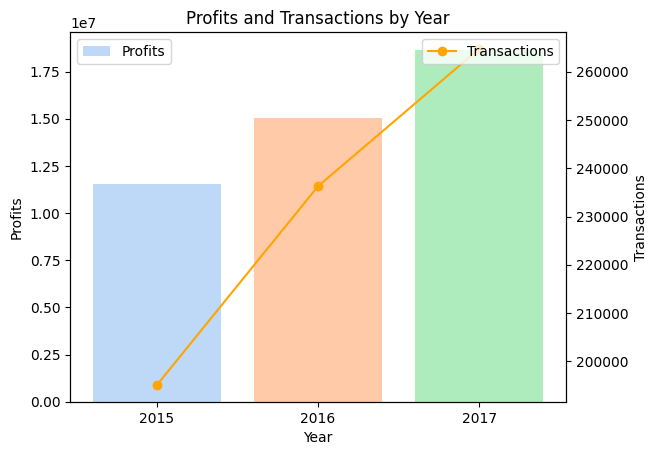

In [ ]:
# simple bar chart of sums of profits across the years
fig, ax = plt.subplots()
profits_sum = [all_2015_df['profit'].sum(), all_2016_df['profit'].sum(), all_2017_df['profit'].sum()]
transactions_count = [all_2015_df['transaction_id'].nunique(), all_2016_df['transaction_id'].nunique(), all_2017_df['transaction_id'].nunique()]
years = ['2015', '2016', '2017']
# Define a color palette
colors = sns.color_palette("pastel")

# Plot the bar chart with the updated colors
ax.bar(years, profits_sum, color=colors, alpha=0.7, label='Profits')
ax2 = ax.twinx()
ax2.plot(years, transactions_count, color='orange', marker='o', linestyle='-', label='Transactions')
ax2.set_ylabel('Transactions')
ax.set_xlabel('Year')
ax.set_ylabel('Profits')
ax.set_title('Profits and Transactions by Year')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### Customers & Rev per Customer

In [ ]:
# Firm: Total Customers
(customer_df
  .loc[customer_df['cohort_date'] <= '2015-12-31', 'customer_id']
 ).nunique()

(customer_df
  .loc[customer_df['cohort_date'] <= '2016-12-31', 'customer_id']
).nunique()

(customer_df
  .loc[customer_df['cohort_date'] <= '2017-12-31', 'customer_id']
).nunique()

97931

126996

166328

In [ ]:
# Firm: Active Customers
act_cust_15= all_2015_df['customer_id'].nunique()
act_cust_16 = all_2016_df['customer_id'].nunique()
act_cust_17 = all_2017_df['customer_id'].nunique()

act_cust_15
act_cust_16
act_cust_17

70015

84557

100156

## Unit Economics

In [ ]:
# Unit Economics: ARPAC
rev_15/act_cust_15
rev_16/act_cust_16
rev_17/act_cust_17

164.49453531416978

177.76618505464037

186.27855596813254

<BarContainer object of 3 artists>

Text(0, 0.5, 'ARPAC')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Active Customer')

Text(0.5, 1.0, 'Active Customers and ARPAC by Year')

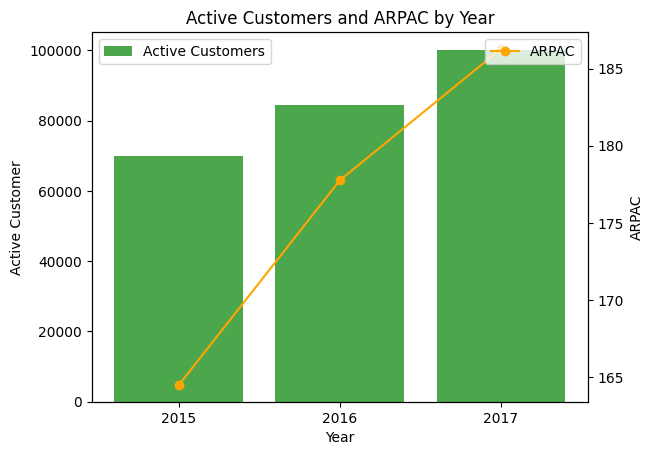

In [ ]:
# simple bar chart of sums of profits across the years
fig, ax = plt.subplots()
unique_customers = [all_2015_df['customer_id'].nunique(), all_2016_df['customer_id'].nunique(), all_2017_df['customer_id'].nunique()]
ARPAC = (np.array(profits_sum) / np.array(unique_customers)).tolist()
years = ['2015', '2016', '2017']
# Define a color palette
colors = sns.color_palette("pastel")

# Plot the bar chart with the updated colors
ax.bar(years, unique_customers, color='green', alpha=0.7, label='Active Customers')
ax2 = ax.twinx()
ax2.plot(years, ARPAC, color='orange', marker='o', linestyle='-', label='ARPAC')
ax2.set_ylabel('ARPAC')
ax.set_xlabel('Year')
ax.set_ylabel('Active Customer')
ax.set_title('Active Customers and ARPAC by Year')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
all_2015_df['profit'].count()

405963

In [ ]:
all_2015_df.shape

(405963, 18)

In [ ]:
# AOV
# find number of transactions each customer has
aov_2015_df = all_2015_df.groupby('transaction_id')['profit'].sum().reset_index(drop=True)
aov_2016_df = all_2016_df.groupby('transaction_id')['profit'].sum().reset_index(drop=True)
aov_2017_df = all_2017_df.groupby('transaction_id')['profit'].sum().reset_index(drop=True)

aov_2015_df.describe(), aov_2016_df.describe(), aov_2017_df.describe()

(count    195100.000000
 mean         59.031701
 std          53.121198
 min           0.017376
 25%          27.583553
 50%          42.243801
 75%          74.760421
 max        1832.741231
 Name: profit, dtype: float64,
 count    236277.000000
 mean         63.617598
 std          53.727840
 min           0.017376
 25%          30.219730
 50%          48.496998
 75%          79.012019
 max        1574.877138
 Name: profit, dtype: float64,
 count    264733.000000
 mean         70.474459
 std          69.831554
 min        -142.548596
 25%          31.619870
 50%          54.946004
 75%          91.317495
 max        2667.818575
 Name: profit, dtype: float64)

In 2016, Indigo issued 4 products that would go on to have negative profits in the subsequent year. In 2017, they would issue an additonal 25 products with negative profits. However, this is only 0.02% of the unique products that they offer.

In [ ]:
# IMPORTANT TO NOTE THAT AOV BECAME NEGATIVE IN 2017
# check  to see if any transcations have a negative profit
(all_2015_df
 .loc[all_2015_df['profit']<0, 'profit']).count()

(all_2016_df
 .loc[all_2016_df['profit']<0, 'profit']).count()

# 29 negative profits in 2017
(all_2017_df
 .loc[all_2017_df['profit']<0, 'profit']).count()

# Product_ID of negative profit
negative_profit_product = (all_2017_df
 .loc[all_2017_df['profit']<0, 'product_id'])


for i in negative_profit_product:
  if i in all_2015_df['product_id'].values:
    print(f"2015: Sales include this product " + i + " that had a negative npv")


for i in negative_profit_product:
  if i in all_2016_df['product_id'].values:
    print(i)



0

0

29

14940.0
169936.0
168886.0
140830.0


In [ ]:
# AOF
# find number of transactions each customer has
aof_2015_df = all_2015_df.groupby('customer_id')['transaction_id'].nunique().reset_index(drop=True)
aof_2016_df = all_2016_df.groupby('customer_id')['transaction_id'].nunique().reset_index(drop=True)
aof_2017_df = all_2017_df.groupby('customer_id')['transaction_id'].nunique().reset_index(drop=True)

aof_2015_df.describe(), aof_2016_df.describe(), aof_2017_df.describe()

(count    70015.000000
 mean         2.786546
 std          3.649294
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max        164.000000
 Name: transaction_id, dtype: float64,
 count    84557.000000
 mean         2.794293
 std          3.666556
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max        112.000000
 Name: transaction_id, dtype: float64,
 count    100156.000000
 mean          2.643207
 std           3.619258
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           3.000000
 max         137.000000
 Name: transaction_id, dtype: float64)

### Retension Rate

In [ ]:
# Retention: Revenue
new_cust_2014 = (customer_df
                 .loc[(customer_df['cohort_date'] >= '2014-01-01') & (customer_df['cohort_date']<= '2014-12-31'), 'customer_id'])

retained_cust_2015 = transactions_df.loc[transactions_df['customer_id'].isin(new_cust_2014), ['amount_spent', 'amount_returned','date','customer_id']]


(retained_cust_2015
  .loc[retained_cust_2015['date'] <= '2015-12-31', 'amount_spent']
  - retained_cust_2015.loc[retained_cust_2015['date'] <= '2015-12-31', 'amount_returned']
).sum()


new_cust_2015 = (customer_df
                 .loc[(customer_df['cohort_date'] >= '2015-01-01') & (customer_df['cohort_date']<= '2015-12-31'), 'customer_id'])

retained_cust_2016 = transactions_df.loc[transactions_df['customer_id'].isin(new_cust_2015), ['amount_spent', 'amount_returned','date','customer_id']]


(retained_cust_2016
  .loc[(retained_cust_2016['date'] <= '2016-12-31') & (retained_cust_2016['date'] >= '2016-01-01'), 'amount_spent']
  - (retained_cust_2016
      .loc[(retained_cust_2016['date'] <= '2016-12-31') & (retained_cust_2016['date'] >= '2016-01-01'), 'amount_returned'])
).sum()



new_cust_2016 = (customer_df
                 .loc[(customer_df['cohort_date'] >= '2016-01-01') & (customer_df['cohort_date']<= '2016-12-31'), 'customer_id'])

retained_cust_2017 = transactions_df.loc[transactions_df['customer_id'].isin(new_cust_2016), ['amount_spent', 'amount_returned','date','customer_id']]


(retained_cust_2017
  .loc[(retained_cust_2017['date'] <= '2017-12-31') & (retained_cust_2017['date'] >= '2017-01-01'), 'amount_spent']
  - (retained_cust_2017
      .loc[(retained_cust_2017['date'] <= '2017-12-31') & (retained_cust_2017['date'] >= '2017-01-01'), 'amount_returned'])
).sum()


1666284.9804427645

1701010.7868574518

2691298.4299676022

In [ ]:
new_cust_2014.nunique()

13547

In [ ]:
# Retention: Customers
retained_cust_2015['customer_id'].nunique()
retained_cust_2016['customer_id'].nunique()
retained_cust_2017['customer_id'].nunique()

retained_cust_2015['customer_id'].nunique()/new_cust_2014.nunique()
retained_cust_2016['customer_id'].nunique()/new_cust_2015.nunique()
retained_cust_2017['customer_id'].nunique()/new_cust_2016.nunique()

13500

17784

29062

0.9965305971801875

0.9509651890273247

0.9998967830724239

#Question 4
Decompose the monthly revenue stream into that coming from existing customers and that coming from new customers.

In [ ]:
# isinstance(tpc_df,pd.DataFrame)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Profits by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Profits')

([<matplotlib.axis.XTick at 0x7e0896e3c310>,
 [Text(0, 0, '2015.0-01'),
  Text(3, 0, '2015.0-04'),
  Text(6, 0, '2015.0-07'),
  Text(9, 0, '2015.0-10'),
  Text(12, 0, '2016.0-01'),
  Text(15, 0, '2016.0-04'),
  Text(18, 0, '2016.0-07'),
  Text(21, 0, '2016.0-10'),
  Text(24, 0, '2017.0-01'),
  Text(27, 0, '2017.0-04'),
  Text(30, 0, '2017.0-07'),
  Text(33, 0, '2017.0-10'),
  Text(36, 0, '2018.0-01')])

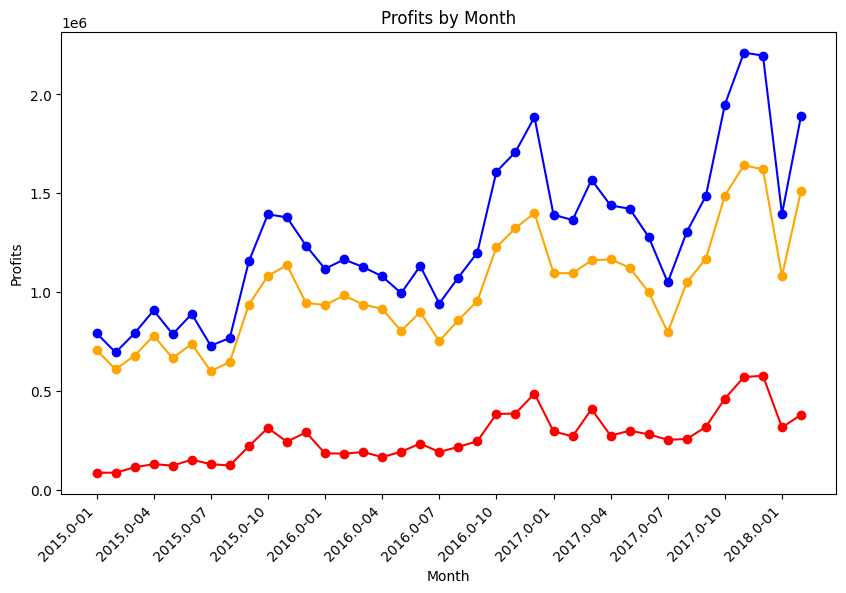

In [ ]:
# tpc_df = pd.merge(tp_df, cleaned_customer_df, on='customer_id', how='left')

new_customer_profits = tp_df[tp_df['cohort_month'] == tp_df['transaction_month']].groupby(['transaction_year', 'transaction_month']).agg({'profit': 'sum'}).reset_index()
monthly_profits = tp_df.groupby(['transaction_year', 'transaction_month']).agg({'profit': 'sum'}).reset_index()
# monthly_profits = tp_df.groupby(['transaction_year', 'transaction_month']).agg({'profit': 'sum', 'transaction_id': 'nunique', 'customer_id': 'nunique'}).reset_index()

# Create a 'Year-Month' column for plotting
monthly_profits['Year-Month'] = monthly_profits['transaction_year'].astype(str) + "-" + monthly_profits['transaction_month'].apply(lambda x: "{:02d}".format(int(x)))


# monthly_profits['Year-Month'] = monthly_profits['transaction_year'].astype(str) + "-" + monthly_profits['transaction_month'].apply(lambda x: f"{x:02d}")
new_customer_profits['Year-Month'] = new_customer_profits['transaction_year'].astype(str) + "-" + new_customer_profits['transaction_month'].apply(lambda x: "{:02d}".format(int(x)))

# plot out the profits per month
plt.figure(figsize=(10, 6))
plt.plot(monthly_profits['Year-Month'], monthly_profits['profit'], marker='o', linestyle='-', color='b')
plt.plot(monthly_profits['Year-Month'], new_customer_profits['profit'], marker='o', linestyle='-', color='r')
plt.plot(monthly_profits['Year-Month'], monthly_profits['profit'] - new_customer_profits['profit'], marker='o', linestyle='-', color='orange')
plt.title('Profits by Month')
plt.xlabel('Month')
plt.ylabel('Profits')
ticks = range(0, len(monthly_profits['Year-Month']), 3)  # Assuming you want ticks every 5 data points
labels = monthly_profits['Year-Month'].iloc[ticks]  # Use the dates from your DataFrame as labels
plt.xticks(ticks, labels, rotation=45, ha='right')
plt.show()





Observations:

-Existing and new profit lines are quite similar except for the existing customer revenue being consistently slightly above the new customer revenue line.

-The data suggests that the ratio of existing to new revenue values are about one to one.

-The even mix between the two also suggests that Indigo is constantly expanding into new customer demographics at the expense of customer loyalty from previous years.

# Question 5: Cohort Analysis

Question 5

a. Revenue and customers as a fraction from the pre-2015 customer base are decreasing overtime between 2015 and 2018. Initially during Jan of 2015, the revenue and customers fractions are 0.948645 and 0.926811 respectively. This value decreases to 0.485191 and 0.461681 by Jan 2018. Over this period of 36 months, we see an average decrease of -1.2873% and -1.2920% in revenue as a percentage and customer as a percentage of pre-2015 values. The reduction in pre-2015 customer base can be attributed to range of possible reasons, such as competitition from similar companies, changing customer preferences, or new customer types as a result of change in product offering. Despite the reduction in the pre-2015 customer base, from our analysis, we still see an increase in revenues. This can be attributed to expanding to new customer demographics and having a higher new customer growth rate than decline in customers due to pre-2015 customer attrition rate.

b. See graph below


In [ ]:
# create a dataframe from cleaned_customer_df that has all customers that signed up before 2015
pre_15_transactions = tp_df[tp_df['cohort_year'] < 2015].reset_index(drop=True)
pre_15_transactions.info()

months = monthly_profits['transaction_year'].astype(str) + "-" + monthly_profits['transaction_month'].apply(lambda x: f"{x:02f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380570 entries, 0 to 1380569
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   customer_id        1380570 non-null  int64         
 1   cohort_date        1380570 non-null  datetime64[ns]
 2   cohort_year        1380570 non-null  int64         
 3   cohort_month       1380570 non-null  int64         
 4   cohort_day         1380570 non-null  int64         
 5   transaction_id     1380136 non-null  float64       
 6   date               1380136 non-null  datetime64[ns]
 7   product_id         594445 non-null   float64       
 8   amount_spent       1380136 non-null  float64       
 9   amount_returned    1380136 non-null  float64       
 10  transaction_year   1380136 non-null  float64       
 11  transaction_month  1380136 non-null  float64       
 12  transaction_day    1380136 non-null  float64       
 13  category           592526 n

In [ ]:
# Group by transaction year and month to calculate revenue and customer count for pre-2015 customers
pre_2015_revenue = pre_15_transactions.groupby(['transaction_year', 'transaction_month'])['amount_spent'].sum()
pre_2015_customers = pre_15_transactions.groupby(['transaction_year', 'transaction_month'])['customer_id'].nunique()

# Calculate total revenue and customer count for each month
total_revenue = tp_df.groupby(['transaction_year', 'transaction_month'])['amount_spent'].sum()
total_customers = tp_df.groupby(['transaction_year', 'transaction_month'])['customer_id'].nunique()

# Compute the fraction of revenue and customers from pre-2015 customers
revenue_fraction = pre_2015_revenue / total_revenue
customer_fraction = pre_2015_customers / total_customers

# Print the results
# print("Fraction of revenue from pre-2015 customers:")
# print(revenue_fraction)
# print("\nFraction of customers from pre-2015 customers:")
# print(customer_fraction)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, '2015.0-1.000000'),
  Text(1, 0, '2015.0-2.000000'),
  Text(2, 0, '2015.0-3.000000'),
  Text(3, 0, '2015.0-4.000000'),
  Text(4, 0, '2015.0-5.000000'),
  Text(5, 0, '2015.0-6.000000'),
  Text(6, 0, '2015.0-7.000000'),
  Text(7, 0, '2015.0-8.000000'),
  Text(8, 0, '2015.0-9.000000'),
  Text(9, 0, '2015.0-10.000000'),
  Text(10, 0, '2015.0-11.000000'),
  Text(11, 0, '2015.0-12.000000'),
  Text(12, 0, '2016.0-1.000000'),
  Text(13, 0, '2016.0-2.000000'),
  Text(14, 0, '2016.0-3.000000'),
  Text(15, 0, '2016.0-4.000000'),
  Text(16, 0, '2016.0-5.000000'),
  Text(17, 0, '2016.0-6.000000'),
  Text(18, 0, '2016.0-7.000000'),
  Text(19, 0, '2016.0-8.000000'),
  Text(20, 0, '2016.0-9.000000'),
  Text(21, 0, '2016.0-10.000000'),
  Text(22, 0, '2016.0-11.000000'),
  Te

Text(0, 0.5, 'Percentage(%)')

(0.0, 1.0)

Text(0.5, 1.0, 'Fraction of Revenue and Customers from Pre-2015 Customer Base')

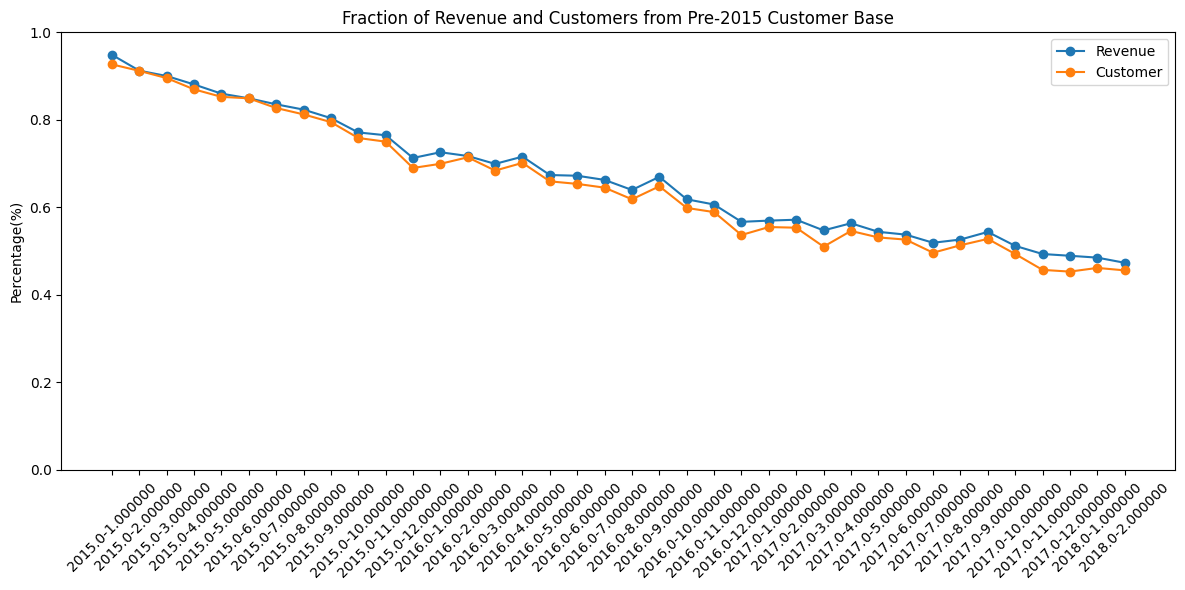

In [ ]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot revenue fraction
ax.plot(months, revenue_fraction.values, marker='o', linestyle='-', label='Revenue')

# Plot customer fraction
ax.plot(months, customer_fraction.values, marker='o', linestyle='-', label='Customer')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis label and limits
ax.set_ylabel('Percentage(%)')
ax.set_ylim(0, 1)

# Set title and legend
ax.set_title('Fraction of Revenue and Customers from Pre-2015 Customer Base')
ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
print("2015 Mean Profit:", aov_2015_df.mean())
print("2015 Standard Deviation of Profit:", aov_2015_df.std)
print("2016 Mean Profit:", aov_2016_df.mean())
print("2016 Standard Deviation of Profit:", aov_2016_df.std)
print("2017 Mean Profit:", aov_2017_df.mean())
print("2017 Standard Deviation of Profit:", aov_2017_df.std)
# Mean profit increases over time from 59.03 (2015) to 63.61 (2016) and to 70.47 (2017).

2015 Mean Profit: 59.03170112773756
2015 Standard Deviation of Profit: <bound method NDFrame._add_numeric_operations.<locals>.std of 0           9.657711
1          16.536220
2         103.941987
3          26.263413
4          20.774503
             ...    
195095     69.410443
195096     41.548996
195097     10.352516
195098     10.352516
195099     52.040464
Name: profit, Length: 195100, dtype: float64>
2016 Mean Profit: 63.61759845293968
2016 Standard Deviation of Profit: <bound method NDFrame._add_numeric_operations.<locals>.std of 0          46.169935
1          23.513445
2          26.647484
3          62.696177
4          39.706296
             ...    
236272    104.150400
236273     27.722495
236274     22.858898
236275     55.514460
236276     69.410443
Name: profit, Length: 236277, dtype: float64>
2017 Mean Profit: 70.47445936677435
2017 Standard Deviation of Profit: <bound method NDFrame._add_numeric_operations.<locals>.std of 0         420.561555
1          76.544276
2    

The previously mentioned mean profit per customer values plus the ARPAC diagrams from before suggests that the ARPAC has increased YoY from 2015 to 2017. With a steadily growing ARPAC, this may indicate customer loyalty or increased brand recognition and product quality which may result in higher consumer behavior.

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Annual Customer Retention Rates by Cohort (Up Until 2015)')

<Axes: title={'center': 'Annual Customer Retention Rates by Cohort (Up Until 2015)'}, xlabel='transaction_year', ylabel='cohort_year'>

Text(120.72222222222221, 0.5, 'Cohort Year')

Text(0.5, 58.7222222222222, 'Transaction Year')

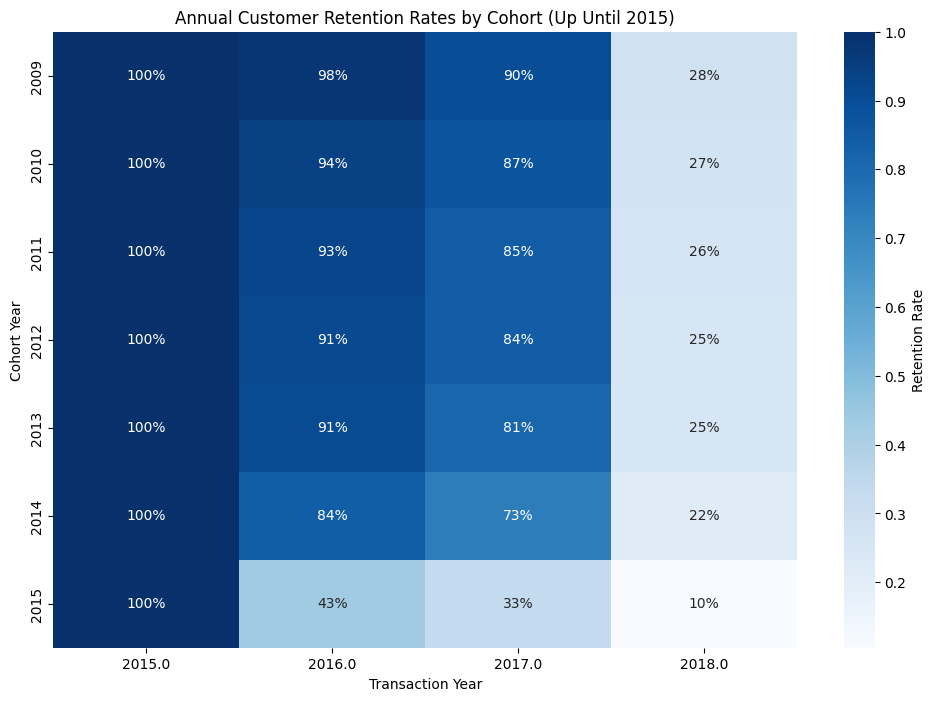

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Annual Revenue Retention Rates by Cohort (Up Until 2015)')

<Axes: title={'center': 'Annual Revenue Retention Rates by Cohort (Up Until 2015)'}, xlabel='transaction_year', ylabel='cohort_year'>

Text(120.72222222222221, 0.5, 'Cohort Year')

Text(0.5, 58.7222222222222, 'Transaction Year')

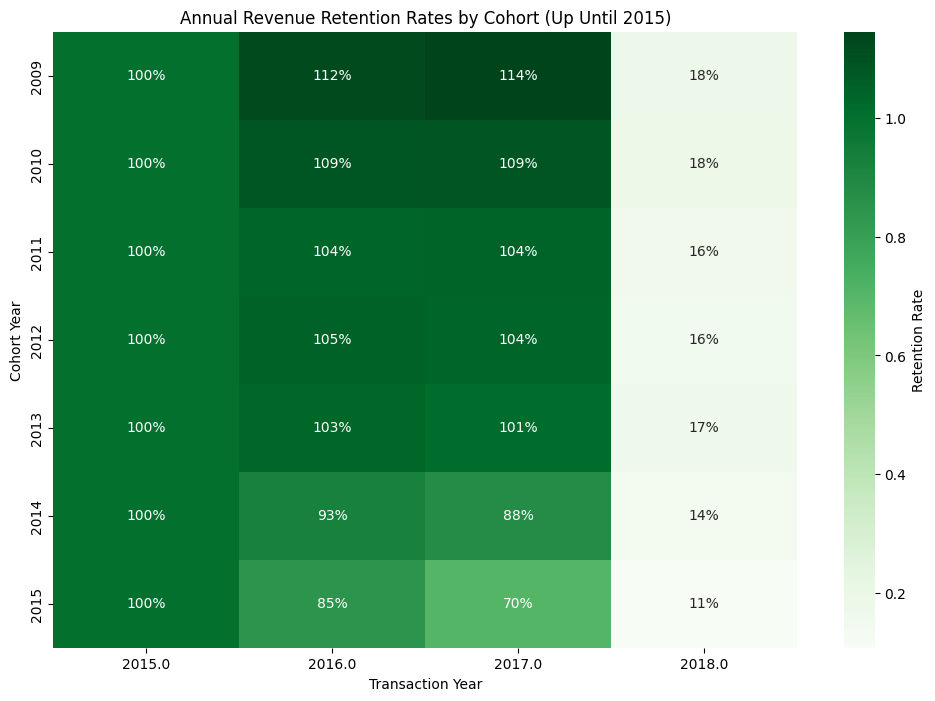

In [ ]:

tp_df['new_cust'] = tp_df.apply(lambda x: 1 if x['cohort_year'] == x['transaction_year'] else 0, axis = 1)




filtered_df = tp_df[tp_df['cohort_year'] < 2016]

cohort_data = filtered_df.pivot_table(
    index='cohort_year',
    columns='transaction_year',
    values=['customer_id', 'profit'],
    aggfunc={'customer_id': pd.Series.nunique, 'profit': sum}
)

customer_retention = cohort_data['customer_id'].divide(cohort_data['customer_id'].iloc[:, 0], axis=0)
revenue_retention = cohort_data['profit'].divide(cohort_data['profit'].iloc[:, 0], axis=0)

customer_retention.fillna(0, inplace=True)
revenue_retention.fillna(0, inplace=True)

plt.figure(figsize=(12, 8))
plt.title('Annual Customer Retention Rates by Cohort (Up Until 2015)')
sns.heatmap(customer_retention, annot=True, fmt='.0%', cmap='Blues', cbar_kws={'label': 'Retention Rate'})
plt.ylabel('Cohort Year')
plt.xlabel('Transaction Year')
plt.show()

plt.figure(figsize=(12, 8))
plt.title('Annual Revenue Retention Rates by Cohort (Up Until 2015)')
sns.heatmap(revenue_retention, annot=True, fmt='.0%', cmap='Greens', cbar_kws={'label': 'Retention Rate'})
plt.ylabel('Cohort Year')
plt.xlabel('Transaction Year')
plt.show()

<BarContainer object of 3 artists>

Text(0, 0.5, 'ARPAC')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Active Customer')

Text(0.5, 1.0, 'Active Customers and ARPAC by Year')

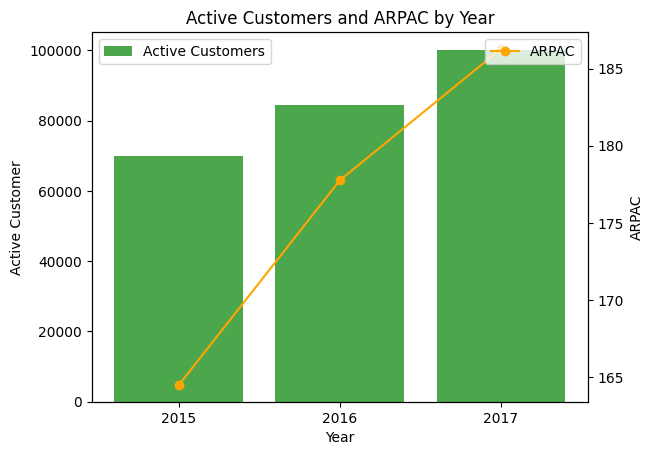

In [ ]:
# simple bar chart of sums of profits across the years
fig, ax = plt.subplots()
unique_customers = [all_2015_df['customer_id'].nunique(), all_2016_df['customer_id'].nunique(), all_2017_df['customer_id'].nunique()]
ARPAC = (np.array(profits_sum) / np.array(unique_customers)).tolist()
years = ['2015', '2016', '2017']
# Define a color palette
colors = sns.color_palette("pastel")

# Plot the bar chart with the updated colors
ax.bar(years, unique_customers, color='green', alpha=0.7, label='Active Customers')
ax2 = ax.twinx()
ax2.plot(years, ARPAC, color='orange', marker='o', linestyle='-', label='ARPAC')
ax2.set_ylabel('ARPAC')
ax.set_xlabel('Year')
ax.set_ylabel('Active Customer')
ax.set_title('Active Customers and ARPAC by Year')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()